# Project 1 [Data science with Python] - Sales Analysis.

# Objective - Perform different operations on the given data to extract useful information.

# Step 1 - Data Wrangling

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
Sales_data = pd.read_csv("AusApparalSales4thQrt2020.csv")

# > Missing value Treatment

In [44]:
# checkingfor missing values in data

Sales_data.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

# Note - There is no missing value in the given data-set

# > checking duplicate value

In [46]:
Sales_data[Sales_data.duplicated()]

,Date,Time,State,Group,Unit,Sales


In [45]:
Sales_data.duplicated().sum()

0

# Note - There is no duplicate value in the given data-set

# > Data Binning

In [ ]:
# Here we categorize the numerical data into intervals

In [ ]:
# statistical information

Sales_data.describe()

In [ ]:
# Here we are going to perform Data bining on Sales columns
# here the minimum value is 5000 while the maximum value is 162500
# We are going to categorise all values with the help of binedges and binlabels

In [47]:
binedges = [0, 50000, 100000, 150000, np.inf]
bin_labels = ['0-50k', '50001-100k', '100001-150k', '150k+']
Sales_data['Sales_range']  = pd.cut(Sales_data['Sales'], bins = binedges, right =False, labels = bin_labels)

In [48]:
Sales_data[['Sales', 'Sales_range']]

,Sales,Sales_range
0,20000,0-50k
1,20000,0-50k
2,10000,0-50k
3,37500,0-50k
4,7500,0-50k
...,...,...
7555,35000,0-50k
7556,37500,0-50k
7557,37500,0-50k
7558,27500,0-50k


In [49]:
Sales_data.head(50)

,Date,Time,State,Group,Unit,Sales,Sales_range
0,1-Oct-20,Morning,WA,Kids,8,20000,0-50k
1,1-Oct-20,Morning,WA,Men,8,20000,0-50k
2,1-Oct-20,Morning,WA,Women,4,10000,0-50k
3,1-Oct-20,Morning,WA,Seniors,15,37500,0-50k
4,1-Oct-20,Afternoon,WA,Kids,3,7500,0-50k
5,1-Oct-20,Afternoon,WA,Men,10,25000,0-50k
6,1-Oct-20,Afternoon,WA,Women,3,7500,0-50k
7,1-Oct-20,Afternoon,WA,Seniors,11,27500,0-50k
8,1-Oct-20,Evening,WA,Kids,15,37500,0-50k
9,1-Oct-20,Evening,WA,Men,15,37500,0-50k


# Handling outlier

In [ ]:
from scipy.stats.mstats import winsorize

In [50]:
Sales_data['winsorized_Sales']  = winsorize(Sales_data['Sales'], limits = [0.05, 0.05])
Sales_data[['Sales', 'winsorized_Sales']]

,Sales,winsorized_Sales
0,20000,20000
1,20000,20000
2,10000,10000
3,37500,37500
4,7500,10000
...,...,...
7555,35000,35000
7556,37500,37500
7557,37500,37500
7558,27500,27500


In [ ]:
# by winsorized method we convert value below 5% with 5% and value above 95% with 95%
# in above we can see in 5th row the sales value was 7500 which replace with a new vaue that is 10000

In [51]:
Sales_data[['Sales', 'winsorized_Sales']].describe()

,Sales,winsorized_Sales
count,7560.000000,7560.000000
mean,45013.558201,44187.830688
std,32253.506944,29486.753256
min,5000.000000,10000.000000
25%,20000.000000,20000.000000
50%,35000.000000,35000.000000
75%,65000.000000,65000.000000
max,162500.000000,107500.000000


In [ ]:
# Here we can clearly check that min value changed upto 5% value ( 5000 replace with 10000)
# max value replace with 95% value( 162500 replace with 107500)

# Data Aggrgation

In [ ]:
# now if we want to find out the total sales for the different groups, total sales for kids, total sales for men, and so on 
# for that we will use data aggregation method

In [39]:
Sales_data[['Group', 'Sales']].groupby('Group').sum()

,Sales
Group,
Kids,85072500
Men,85750000
Seniors,84037500
Women,85442500


# Note - Mens have the highest total for sales here
# Note - Group Seniors has comparitively lowest sale

In [38]:
Sales_data[['Group', 'Sales']].groupby('Group').count()

,Sales
Group,
Kids,1890
Men,1890
Seniors,1890
Women,1890


# Note - Number of sales are equal for each particular group

# Step -2 Data Analysis

# Statistical Analysis for Unit and Sales Data

In [ ]:
# First we calculate the mean value of Unit data

In [57]:
np.mean(Sales_data['Unit'])

18.00542328042328

In [ ]:
# Now the mean value of Sales data

In [59]:
np.mean(Sales_data['Sales'])

45013.5582010582

In [60]:
# Median value of unit data

In [61]:
np.median(Sales_data['Unit'])

14.0

In [62]:
# Median value of sales data

In [63]:
np.median(Sales_data['Sales'])

35000.0

In [64]:
# STD for the unit data

In [65]:
np.std(Sales_data['Unit'])

12.900549481988609

In [ ]:
# STD for the sales data

In [66]:
np.std(Sales_data['Sales'])

32251.373704971687

In [77]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Date              7560 non-null   object  
 1   Time              7560 non-null   object  
 2   State             7560 non-null   object  
 3   Group             7560 non-null   object  
 4   Unit              7560 non-null   int64   
 5   Sales             7560 non-null   int64   
 6   Sales_range       7560 non-null   category
 7   winsorized_Sales  7560 non-null   int64   
dtypes: category(1), int64(3), object(4)
memory usage: 421.1+ KB


In [93]:
dummies = pd.get_dummies(Sales_data)

In [94]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Columns: 111 entries, Unit to Sales_range_150k+
dtypes: bool(108), int64(3)
memory usage: 974.7 KB


In [97]:
dummies.head()

,Unit,Sales,winsorized_Sales,Date_1-Dec-20,Date_1-Nov-20,Date_1-Oct-20,Date_10-Dec-20,Date_10-Nov-20,Date_10-Oct-20,Date_11-Dec-20,...,State_ VIC,State_ WA,Group_ Kids,Group_ Men,Group_ Seniors,Group_ Women,Sales_range_0-50k,Sales_range_50001-100k,Sales_range_100001-150k,Sales_range_150k+
0,8,20000,20000,False,False,True,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False
1,8,20000,20000,False,False,True,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
2,4,10000,10000,False,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
3,15,37500,37500,False,False,True,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
4,3,7500,10000,False,False,True,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False


# Step 3 - Data Visualization

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
cat = Sales_data['Group']
Sales = Sales_data['Sales']

C:\Users\hp\Downloads\anc\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


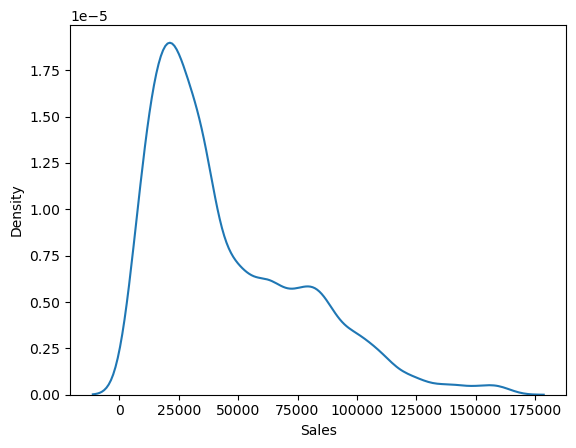

In [98]:
sns.kdeplot(Sales)
plt.show()

In [72]:
cat = Sales_data['Group']
Sales = Sales_data['Sales']

<BarContainer object of 7560 artists>

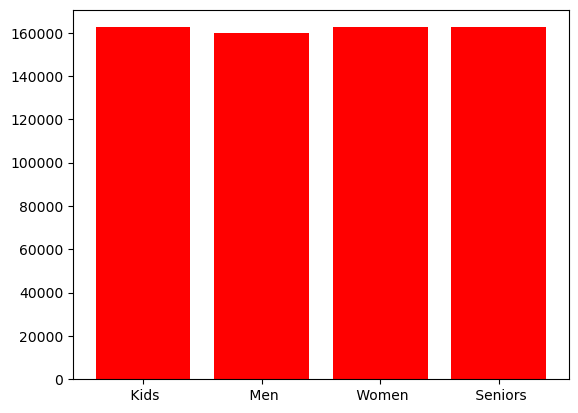

In [73]:
plt.bar(cat, Sales, color = 'red')

In [78]:
State = Sales_data['State']
Sales = Sales_data['Sales']

<BarContainer object of 7560 artists>

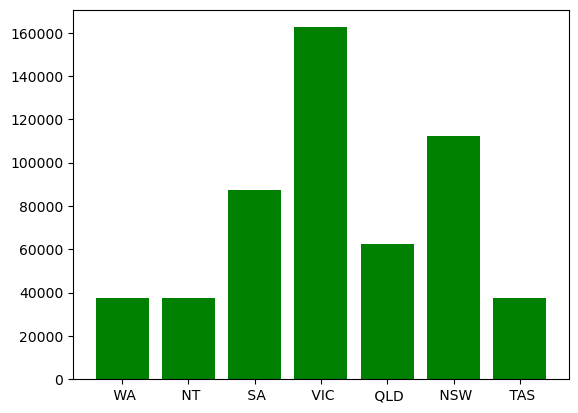

In [79]:
plt.bar(State, Sales, color = 'Green')

# Note - State VIC has highest bumber of sales